Suggestions from Fleischer meeting(08/17/22)
- Use all the SeattleUndergrad data. Try other datasets too(check for Simpson's paradox).
- Use a different standarization method where we standarize by each person's mean bedtime and sleep duration (z-score).
- Does activity the day before affect bedtime the next day
- it's possible that linear models don't work well here because we might only see changes in activity when people get abnormally low or high amounts of sleep/bedtime.

## Seattle Undergrad Summer 2016 + Summer 2017 Analysis

In [1]:
from SALA import processing
from SALA import plots
import pandas as pd
import numpy as np
import datetime
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
all_summer_raw = pd.read_parquet('data/seattle_undergrad/raw/all_summer_raw.parquet')
all_summer_raw

,Off-Wrist Status,Activity,Marker,White Light,Red Light,Green Light,Blue Light,Sleep/Wake,Interval Status,UID,Group
DateTime,,,,,,,,,,,
2016-07-12 16:11:00,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,ACTIVE,summer_160048,summer_16
2016-07-12 16:11:15,0,0.0,0.0,0.00,2.50,1.83,1.82,NaN,ACTIVE,summer_160048,summer_16
2016-07-12 16:11:30,0,0.0,0.0,0.00,1.59,1.83,1.82,NaN,ACTIVE,summer_160048,summer_16
2016-07-12 16:11:45,0,0.0,0.0,0.00,2.50,1.83,1.82,NaN,ACTIVE,summer_160048,summer_16
2016-07-12 16:12:00,0,0.0,0.0,0.00,2.50,1.83,1.82,NaN,ACTIVE,summer_160048,summer_16
...,...,...,...,...,...,...,...,...,...,...,...
2017-07-26 14:42:00,0,27.0,0.0,52.54,73.70,51.00,40.10,NaN,ACTIVE,summer170022,summer17
2017-07-26 14:42:15,0,105.0,0.0,247.24,115.00,136.00,81.30,NaN,ACTIVE,summer170022,summer17
2017-07-26 14:42:30,0,9.0,0.0,172.63,61.60,47.20,38.60,NaN,ACTIVE,summer170022,summer17


In [3]:
all_summer_processed = pd.read_parquet('data/seattle_undergrad/processed/all_summertiming.parquet')
all_summer_processed

,UID,Date,Threshold,Last Light,Mins to LL from 4AM,First Light,Mins to FL from 4AM,Time above threshold,Time above threshold AM,Minutes above threshold,...,GroupDayofWeek,GroupDayType,Weekend/Holiday,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM,Sunrise,Sunset
0,summer_160048,2016-07-12,5,NaT,NaN,NaT,NaN,0 days 00:00:00,0 days 00:00:00,0.00,...,summer_16Tues,summer_16Weekday,False,2016-07-12 00:00:00,2016-07-12 00:00:00,0 days 00:00:00,0.00,0.00,NaT,NaT
1,summer_160048,2016-07-20,5,2016-07-21 01:39:00,1299.0,2016-07-20 09:16:45,316.0,0 days 06:34:45,0 days 01:02:30,394.75,...,summer_16Wed,summer_16Weekday,False,2016-07-21 02:08:30,2016-07-21 08:15:30,0 days 06:07:00,1568.50,495.50,NaT,NaT
2,summer_160048,2016-07-22,5,2016-07-23 01:56:45,1316.0,2016-07-22 06:22:15,142.0,0 days 02:59:15,0 days 00:59:30,179.25,...,summer_16Fri,summer_16Weekday,False,2016-07-23 02:20:00,2016-07-23 09:39:15,0 days 07:19:15,1580.00,579.25,NaT,NaT
3,summer_160048,2016-07-27,5,2016-07-27 11:02:15,422.0,2016-07-27 09:09:15,309.0,0 days 00:42:30,0 days 00:42:30,42.50,...,summer_16Wed,summer_16Weekday,False,2016-07-27 00:00:00,2016-07-27 00:00:00,0 days 00:00:00,0.00,0.00,NaT,NaT
4,summer_160048,2016-07-25,5,2016-07-26 00:38:00,1238.0,2016-07-25 08:44:45,284.0,0 days 07:04:15,0 days 01:23:45,424.25,...,summer_16Mon,summer_16Weekday,False,2016-07-26 00:53:45,2016-07-26 11:36:45,0 days 10:43:00,1493.75,696.75,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4714,summer170022,2017-07-26,500,2017-07-26 14:31:15,631.0,2017-07-26 09:16:15,316.0,0 days 01:02:00,0 days 00:18:30,62.00,...,summer17Wed,summer17Weekday,False,2017-07-26 00:00:00,2017-07-26 00:00:00,0 days 00:00:00,0.00,0.00,2017-07-26 05:15:33.121509+01:00,2017-07-26 20:56:36.681919+01:00
4715,summer170022,2017-07-11,500,NaT,NaN,NaT,NaN,0 days 00:00:00,0 days 00:00:00,0.00,...,summer17Tues,summer17Weekday,False,2017-07-11 00:00:00,2017-07-11 00:00:00,0 days 00:00:00,0.00,0.00,2017-07-11 04:56:35.228949+01:00,2017-07-11 21:13:53.510705+01:00
4716,summer170022,2017-07-23,500,2017-07-23 23:48:15,1188.0,2017-07-23 07:45:30,225.0,0 days 02:43:45,0 days 01:05:45,163.75,...,summer17Sun,summer17Weekend/Holiday,True,2017-07-24 00:19:15,2017-07-24 06:22:15,0 days 06:03:00,1459.25,382.25,2017-07-23 05:11:21.627239+01:00,2017-07-23 21:00:47.238295+01:00
4717,summer170022,2017-07-16,500,2017-07-16 19:42:15,942.0,2017-07-16 09:05:15,305.0,0 days 00:58:15,0 days 00:26:00,58.25,...,summer17Sun,summer17Weekend/Holiday,True,2017-07-17 02:58:00,2017-07-17 07:23:30,0 days 04:25:30,1618.00,443.50,2017-07-16 05:02:17.406115+01:00,2017-07-16 21:09:10.685513+01:00


In [4]:
#calculate total activity from wakeup to sleep and divides it by the amount of time the person was awake aka sleep-wakeup
def calculateActivity(wakeup, sleep, raw):
    if len(raw[(raw['DateTime']>wakeup) & (raw['DateTime']<sleep)].groupby('Group').sum().get('Activity')) == 0:
        return 0
    total_activity = raw[(raw['DateTime']>wakeup) & (raw['DateTime']<sleep)].groupby('Group').sum().get('Activity').iloc[0]
    total_hrs_awake = (sleep-wakeup)/datetime.timedelta(hours=1) #number of hours awake
    return total_activity/total_hrs_awake

def addActivityInfo(sleep_df, raw):
    length = sleep_df.shape[0]
    for i in range(length-1):
        sleep_df.iloc[i,sleep_df.columns.get_loc('Activity')] = calculateActivity(sleep_df['Sleep offset'].iloc[i], sleep_df['Sleep onset'].iloc[i+1], raw)
    return sleep_df

def completeActivityDataframe(sleep_df, raw):
    useful_columns = ['UID', 'Date', 'GroupDayType', 'Sleep onset', 'Sleep offset', 'Sleep duration', 'Sleep onset MSLM', 'Sleep offset MSLM']
    sleep_df = sleep_df[useful_columns].drop_duplicates() #clean sleep_df
    zero_array = sleep_df.shape[0]*[0]
    sleep_df['Activity'] = zero_array
    raw = raw.reset_index().sort_values(by='DateTime')
    output = pd.DataFrame()
    for uid in sleep_df.UID.unique():
        unique_df = sleep_df[sleep_df['UID'] == uid].sort_values('Date')
        unique_raw = raw[raw['UID'] == uid]
        output = output.append(addActivityInfo(unique_df, unique_raw))
    return output

In [5]:
all_summer_activity = completeActivityDataframe(all_summer_processed, all_summer_raw)
all_summer_activity

,UID,Date,GroupDayType,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM,Activity
0,summer_160048,2016-07-12,summer_16Weekday,2016-07-12 00:00:00,2016-07-12 00:00:00,0 days 00:00:00,0.00,0.00,3394.052191
14,summer_160048,2016-07-13,summer_16Weekday,2016-07-14 02:46:30,2016-07-14 08:49:15,0 days 06:02:45,1606.50,529.25,15868.927303
9,summer_160048,2016-07-14,summer_16Weekday,2016-07-15 02:25:00,2016-07-15 12:27:30,0 days 10:02:30,1585.00,747.50,18214.776589
5,summer_160048,2016-07-15,summer_16Weekday,2016-07-16 01:42:00,2016-07-16 09:03:00,0 days 07:21:00,1542.00,543.00,29356.921776
15,summer_160048,2016-07-16,summer_16Weekend/Holiday,2016-07-17 04:45:30,2016-07-17 13:34:30,0 days 08:49:00,1725.50,814.50,28099.839554
...,...,...,...,...,...,...,...,...,...
3747,summer170022,2017-07-22,summer17Weekend/Holiday,2017-07-22 23:24:30,2017-07-23 06:58:00,0 days 07:33:30,1404.50,418.00,11672.701080
3753,summer170022,2017-07-23,summer17Weekend/Holiday,2017-07-24 00:19:15,2017-07-24 06:22:15,0 days 06:03:00,1459.25,382.25,10852.932048
3745,summer170022,2017-07-24,summer17Weekday,2017-07-25 00:05:30,2017-07-25 07:32:30,0 days 07:27:00,1445.50,452.50,11542.921694
3748,summer170022,2017-07-25,summer17Weekday,2017-07-25 23:46:15,2017-07-26 08:44:30,0 days 08:58:15,1426.25,524.50,0.000000


In [6]:
#converts column Sleep duration from a timedelta to a float
def timedeltaToFloat(timedelta):
    return timedelta/datetime.timedelta(hours=1)

In [7]:
all_summer_activity['Sleep duration'] = all_summer_activity['Sleep duration'].apply(timedeltaToFloat)

In [8]:
all_summer_activity = all_summer_activity[(all_summer_activity['Activity']!=0) & (all_summer_activity['Sleep duration']!=0)]
all_summer_activity

,UID,Date,GroupDayType,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM,Activity
14,summer_160048,2016-07-13,summer_16Weekday,2016-07-14 02:46:30,2016-07-14 08:49:15,6.045833,1606.50,529.25,15868.927303
9,summer_160048,2016-07-14,summer_16Weekday,2016-07-15 02:25:00,2016-07-15 12:27:30,10.041667,1585.00,747.50,18214.776589
5,summer_160048,2016-07-15,summer_16Weekday,2016-07-16 01:42:00,2016-07-16 09:03:00,7.350000,1542.00,543.00,29356.921776
15,summer_160048,2016-07-16,summer_16Weekend/Holiday,2016-07-17 04:45:30,2016-07-17 13:34:30,8.816667,1725.50,814.50,28099.839554
11,summer_160048,2016-07-17,summer_16Weekend/Holiday,2016-07-18 01:31:15,2016-07-18 12:23:00,10.862500,1531.25,743.00,28247.682620
...,...,...,...,...,...,...,...,...,...
3755,summer170022,2017-07-20,summer17Weekday,2017-07-21 00:37:00,2017-07-21 08:31:45,7.912500,1477.00,511.75,12789.649485
3752,summer170022,2017-07-21,summer17Weekday,2017-07-22 00:41:45,2017-07-22 10:22:30,9.679167,1481.75,622.50,5265.805627
3747,summer170022,2017-07-22,summer17Weekend/Holiday,2017-07-22 23:24:30,2017-07-23 06:58:00,7.558333,1404.50,418.00,11672.701080
3753,summer170022,2017-07-23,summer17Weekend/Holiday,2017-07-24 00:19:15,2017-07-24 06:22:15,6.050000,1459.25,382.25,10852.932048


In [9]:
all_summer_activity[all_summer_activity['UID']=='summer_160048']['Sleep duration'].mean()

7.549038461538462

In [10]:
all_summer_activity[all_summer_activity['UID']=='summer_160048']['Sleep duration'].std()

2.0211577301528685

**Standarized Bedtime**

In [11]:
all_summer_activity['bedtime'] = all_summer_activity['Sleep onset'].dt.strftime("%H").astype(int) + all_summer_activity['Sleep onset'].dt.strftime("%M").astype(int)/60

/var/folders/21/3pfj48b93_dfj5qvpfdk7v0h0000gn/T/ipykernel_88902/1108391867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_summer_activity['bedtime'] = all_summer_activity['Sleep onset'].dt.strftime("%H").astype(int) + all_summer_activity['Sleep onset'].dt.strftime("%M").astype(int)/60


Earliest bedtime in army time

In [12]:
all_summer_activity[all_summer_activity['bedtime']>15].sort_values(by='bedtime').bedtime.iloc[0]

20.616666666666667

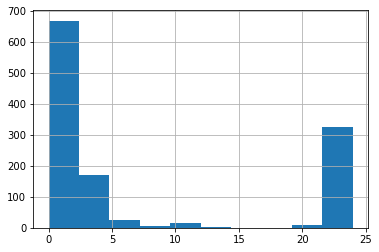

In [13]:
hist = all_summer_activity['bedtime'].hist(bins=10)

In [14]:
#earliest_bedtime must be greater than all bedtimes in activity_df. Even if it's just by 0.0001
def standarize_bedtime(bedtime, earliest_bedtime):
    if earliest_bedtime<=bedtime<=24:
        return bedtime-earliest_bedtime
    elif bedtime<16:
        return (24-earliest_bedtime)+bedtime
    else:
        return "error with standarizing"
    
all_summer_activity['standarized_bedtime'] = all_summer_activity['bedtime'].apply(standarize_bedtime, earliest_bedtime = 20.61666)
all_summer_activity.sort_values(by='standarized_bedtime')

/var/folders/21/3pfj48b93_dfj5qvpfdk7v0h0000gn/T/ipykernel_88902/2038006396.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_summer_activity['standarized_bedtime'] = all_summer_activity['bedtime'].apply(standarize_bedtime, earliest_bedtime = 20.61666)


,UID,Date,GroupDayType,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM,Activity,bedtime,standarized_bedtime
424,summer_160053,2016-07-25,summer_16Weekday,2016-07-25 20:37:15,2016-07-26 06:50:00,10.212500,1237.25,410.00,14259.259882,20.616667,0.000007
984,summer_160045,2016-06-30,summer_16Weekday,2016-06-30 20:38:15,2016-07-01 04:58:15,8.333333,1238.25,298.25,13519.349153,20.633333,0.016673
808,summer_160067,2016-07-15,summer_16Weekday,2016-07-15 20:54:45,2016-07-16 07:07:30,10.212500,1254.75,427.50,15834.189849,20.900000,0.283340
698,summer_160060,2016-07-15,summer_16Weekday,2016-07-15 20:59:00,2016-07-16 04:28:15,7.487500,1259.00,268.25,19346.830189,20.983333,0.366673
3663,summer170024,2017-07-12,summer17Weekday,2017-07-12 21:14:15,2017-07-13 05:50:15,8.600000,1274.25,350.25,12288.651911,21.233333,0.616673
...,...,...,...,...,...,...,...,...,...,...,...
352,summer_160038,2016-06-27,summer_16Weekday,2016-06-28 10:59:15,2016-06-28 16:20:00,5.345833,2099.25,980.00,15568.351648,10.983333,14.366673
207,summer_160031,2016-06-27,summer_16Weekday,2016-06-28 11:00:00,2016-06-28 17:21:30,6.358333,2100.00,1041.50,7038.868335,11.000000,14.383340
481,summer_160028,2016-06-27,summer_16Weekday,2016-06-28 11:00:15,2016-06-28 17:22:00,6.362500,2100.25,1042.00,12061.718213,11.000000,14.383340
272,summer_160008,2016-06-27,summer_16Weekday,2016-06-28 11:00:00,2016-06-28 17:21:15,6.354167,2100.00,1041.25,8574.775993,11.000000,14.383340


In [43]:
def createDictionaries(activity_df):
    mean_sleep_dict = {}
    std_sleep_dict = {}
    mean_bedtime_dict = {}
    std_bedtime_dict = {}
    mean_activity_dict = {}
    std_activity_dict = {}
    for uid in activity_df.UID.unique():
        cur_df = activity_df[activity_df['UID']==uid]
        mean_sleep_dict[uid] = cur_df['Sleep duration'].mean()
        std_sleep_dict[uid] = cur_df['Sleep duration'].std()
        mean_bedtime_dict[uid] = cur_df['standarized_bedtime'].mean()
        std_bedtime_dict[uid] = cur_df['standarized_bedtime'].std()
        mean_activity_dict[uid] = cur_df['Activity'].mean()
        std_activity_dict[uid] = cur_df['Activity'].std()
    return mean_sleep_dict, std_sleep_dict, mean_bedtime_dict, std_bedtime_dict, mean_activity_dict, std_activity_dict

In [46]:
def z_score_calculator(row, variable, mean_sleep_dict, std_sleep_dict, mean_bedtime_dict, std_bedtime_dict, mean_activity_dict, std_activity_dict):
    if variable == 'Sleep duration':
        return (row['Sleep duration'] - mean_sleep_dict[row['UID']])/std_sleep_dict[row['UID']]
    elif variable == 'standarized_bedtime':
        return (row['standarized_bedtime'] - mean_bedtime_dict[row['UID']])/std_bedtime_dict[row['UID']]
    elif variable == 'Activity':
        return (row['Activity'] - mean_activity_dict[row['UID']])/std_activity_dict[row['UID']]
    else:
        return "ERROR bad input to z_score_calculator"

def createStandarizedColumns(activity_df, mean_sleep_dict, std_sleep_dict, mean_bedtime_dict, std_bedtime_dict, mean_activity_dict, std_activity_dict):
#     activity_df['sleep_duration_zscore'] = activity_df.apply(z_score_calculator, variable = 'Sleep duration',axis=1)
#     activity_df['bedtime_zscore'] = activity_df.apply(z_score_calculator, variable = 'standarized_bedtime',axis=1)
    activity_df['sleep_duration_zscore'] = activity_df.apply(z_score_calculator, args = ('Sleep duration', mean_sleep_dict, std_sleep_dict, mean_bedtime_dict, std_bedtime_dict, mean_activity_dict, std_activity_dict) ,axis=1)
    activity_df['bedtime_zscore'] = activity_df.apply(z_score_calculator, args = ('standarized_bedtime', mean_sleep_dict, std_sleep_dict, mean_bedtime_dict, std_bedtime_dict, mean_activity_dict, std_activity_dict),axis=1)
    activity_df['Activity'] = activity_df.apply(z_score_calculator, args = ('Activity', mean_sleep_dict, std_sleep_dict, mean_bedtime_dict, std_bedtime_dict, mean_activity_dict, std_activity_dict),axis=1)

In [47]:
mean_sleep_dict, std_sleep_dict, mean_bedtime_dict, std_bedtime_dict, mean_activity_dict, std_activity_dict = createDictionaries(all_summer_activity)
createStandarizedColumns(all_summer_activity, mean_sleep_dict, std_sleep_dict, mean_bedtime_dict, std_bedtime_dict, mean_activity_dict, std_activity_dict)

/var/folders/21/3pfj48b93_dfj5qvpfdk7v0h0000gn/T/ipykernel_88902/408310297.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity_df['sleep_duration_zscore'] = activity_df.apply(z_score_calculator, args = ('Sleep duration', mean_sleep_dict, std_sleep_dict, mean_bedtime_dict, std_bedtime_dict, mean_activity_dict, std_activity_dict) ,axis=1)
/var/folders/21/3pfj48b93_dfj5qvpfdk7v0h0000gn/T/ipykernel_88902/408310297.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity_df['bedtime_zscore'] = act

In [18]:
print(all_summer_activity.shape[0])
all_summer_activity.head(15)

1220


,UID,Date,GroupDayType,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM,Activity,bedtime,standarized_bedtime,sleep_duration_zscore,bedtime_zscore
14,summer_160048,2016-07-13,summer_16Weekday,2016-07-14 02:46:30,2016-07-14 08:49:15,6.045833,1606.50,529.25,15868.927303,2.766667,6.150007,-0.743735,0.311579
9,summer_160048,2016-07-14,summer_16Weekday,2016-07-15 02:25:00,2016-07-15 12:27:30,10.041667,1585.00,747.50,18214.776589,2.416667,5.800007,1.233268,0.067151
5,summer_160048,2016-07-15,summer_16Weekday,2016-07-16 01:42:00,2016-07-16 09:03:00,7.350000,1542.00,543.00,29356.921776,1.700000,5.083340,-0.098477,-0.433345
15,summer_160048,2016-07-16,summer_16Weekend/Holiday,2016-07-17 04:45:30,2016-07-17 13:34:30,8.816667,1725.50,814.50,28099.839554,4.750000,8.133340,0.627179,1.696671
11,summer_160048,2016-07-17,summer_16Weekend/Holiday,2016-07-18 01:31:15,2016-07-18 12:23:00,10.862500,1531.25,743.00,28247.682620,1.516667,4.900007,1.639388,-0.561379
6,summer_160048,2016-07-18,summer_16Weekday,2016-07-19 01:37:00,2016-07-19 09:12:00,7.583333,1537.00,552.00,20345.914664,1.616667,5.000007,0.016968,-0.491542
10,summer_160048,2016-07-19,summer_16Weekday,2016-07-20 02:11:30,2016-07-20 09:13:00,7.025000,1571.50,553.00,16890.044313,2.183333,5.566673,-0.259276,-0.095801
1,summer_160048,2016-07-20,summer_16Weekday,2016-07-21 02:08:30,2016-07-21 08:15:30,6.116667,1568.50,495.50,14914.646802,2.133333,5.516673,-0.708689,-0.130720
12,summer_160048,2016-07-21,summer_16Weekday,2016-07-22 00:28:45,2016-07-22 05:29:15,5.008333,1468.75,329.25,14562.574455,0.466667,3.850007,-1.257054,-1.294663
2,summer_160048,2016-07-22,summer_16Weekday,2016-07-23 02:20:00,2016-07-23 09:39:15,7.320833,1580.00,579.25,27648.650000,2.333333,5.716673,-0.112908,0.008953


**Sleep duration vs Activity**

In [19]:
predictors = ['sleep_duration_zscore']
X = all_summer_activity[predictors]
Y = all_summer_activity['Activity']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

<AxesSubplot:xlabel='sleep_duration_zscore', ylabel='Activity'>

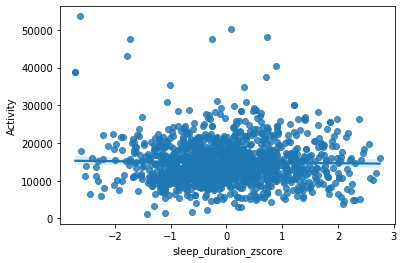

In [20]:
sns.regplot(x='sleep_duration_zscore', y='Activity', data=all_summer_activity)

In [21]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Activity   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6059
Date:                Wed, 24 Aug 2022   Prob (F-statistic):              0.436
Time:                        16:07:02   Log-Likelihood:                -12310.
No. Observations:                1220   AIC:                         2.462e+04
Df Residuals:                    1218   BIC:                         2.463e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.493e+04    167.080     89.361      0.000    1.46e+04    1.53e+04
sleep_duration_zscore  -135.6142    174.224     -0.778      0.436    -477.427     206.198
==============================================================================
Omnibus:                      397.959   Durbin-Watson:                   1.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1975.854
Skew:                           1.440   Prob(JB):                         0.00
Kurtosis:                       8.529   Cond. No.                         1.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Standarized Bedtime vs Activity**

In [22]:
predictors = ['bedtime_zscore']
X = all_summer_activity[predictors]
Y = all_summer_activity['Activity']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

<AxesSubplot:xlabel='bedtime_zscore', ylabel='Activity'>

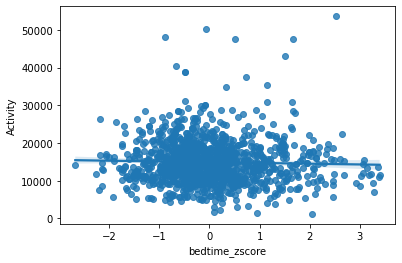

In [23]:
sns.regplot(x='bedtime_zscore', y='Activity', data=all_summer_activity)

In [24]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Activity   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.311
Date:                Wed, 24 Aug 2022   Prob (F-statistic):              0.252
Time:                        16:07:02   Log-Likelihood:                -12309.
No. Observations:                1220   AIC:                         2.462e+04
Df Residuals:                    1218   BIC:                         2.463e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.493e+04    167.032     89.386      0.000    1.46e+04    1.53e+04
bedtime_zscore  -199.4215    174.174     -1.145      0.252    -541.135     142.292
==============================================================================
Omnibus:                      408.178   Durbin-Watson:                   1.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2115.979
Skew:                           1.466   Prob(JB):                         0.00
Kurtosis:                       8.747   Cond. No.                         1.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Process of creating the activity_df using all the quarters

In [32]:
all_summer_raw

,Off-Wrist Status,Activity,Marker,White Light,Red Light,Green Light,Blue Light,Sleep/Wake,Interval Status,UID,Group
DateTime,,,,,,,,,,,
2016-07-12 16:11:00,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,ACTIVE,summer_160048,summer_16
2016-07-12 16:11:15,0,0.0,0.0,0.00,2.50,1.83,1.82,NaN,ACTIVE,summer_160048,summer_16
2016-07-12 16:11:30,0,0.0,0.0,0.00,1.59,1.83,1.82,NaN,ACTIVE,summer_160048,summer_16
2016-07-12 16:11:45,0,0.0,0.0,0.00,2.50,1.83,1.82,NaN,ACTIVE,summer_160048,summer_16
2016-07-12 16:12:00,0,0.0,0.0,0.00,2.50,1.83,1.82,NaN,ACTIVE,summer_160048,summer_16
...,...,...,...,...,...,...,...,...,...,...,...
2017-07-26 14:42:00,0,27.0,0.0,52.54,73.70,51.00,40.10,NaN,ACTIVE,summer170022,summer17
2017-07-26 14:42:15,0,105.0,0.0,247.24,115.00,136.00,81.30,NaN,ACTIVE,summer170022,summer17
2017-07-26 14:42:30,0,9.0,0.0,172.63,61.60,47.20,38.60,NaN,ACTIVE,summer170022,summer17


In [33]:
all_winter_raw = pd.read_parquet('data/seattle_undergrad/raw/all_winter_raw.parquet')
all_winter_raw

,Off-Wrist Status,Activity,Marker,White Light,Red Light,Green Light,Blue Light,Sleep/Wake,Interval Status,UID,Group
DateTime,,,,,,,,,,,
2018-02-08 00:52:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,winter0112,winter
2018-02-08 00:52:15,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,winter0112,winter
2018-02-08 00:52:30,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,winter0112,winter
2018-02-08 00:52:45,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,winter0112,winter
2018-02-08 00:53:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,winter0112,winter
...,...,...,...,...,...,...,...,...,...,...,...
2018-02-07 15:34:30,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,winter0041,winter
2018-02-07 15:34:45,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,winter0041,winter
2018-02-07 15:35:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,winter0041,winter


In [34]:
all_spring_raw = pd.read_parquet('data/seattle_undergrad/raw/all_spring_raw.parquet')
all_spring_raw

,Off-Wrist Status,Activity,Marker,White Light,Red Light,Green Light,Blue Light,Sleep/Wake,Interval Status,UID,Group
DateTime,,,,,,,,,,,
2017-03-24 17:07:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,spring_170019,spring_17
2017-03-24 17:07:15,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,spring_170019,spring_17
2017-03-24 17:07:30,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,spring_170019,spring_17
2017-03-24 17:07:45,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,spring_170019,spring_17
2017-03-24 17:08:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,spring_170019,spring_17
...,...,...,...,...,...,...,...,...,...,...,...
2018-05-08 15:20:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,spring_180067,spring_18
2018-05-08 15:20:15,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,spring_180067,spring_18
2018-05-08 15:20:30,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,spring_180067,spring_18


In [35]:
all_fall_raw = pd.read_parquet('data/seattle_undergrad/raw/all_fall_raw.parquet')
all_fall_raw

,Off-Wrist Status,Activity,Marker,White Light,Red Light,Green Light,Blue Light,Sleep/Wake,Interval Status,UID,Group
DateTime,,,,,,,,,,,
2015-10-06 10:00:00,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,ACTIVE,fall_150034,fall_15
2015-10-06 10:00:15,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,ACTIVE,fall_150034,fall_15
2015-10-06 10:00:30,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,ACTIVE,fall_150034,fall_15
2015-10-06 10:00:45,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,ACTIVE,fall_150034,fall_15
2015-10-06 10:01:00,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,ACTIVE,fall_150034,fall_15
...,...,...,...,...,...,...,...,...,...,...,...
2016-11-16 15:42:30,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,fall_160030,fall_16
2016-11-16 15:42:45,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,fall_160030,fall_16
2016-11-16 15:43:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,fall_160030,fall_16


In [36]:
all_summer_processed = pd.read_parquet('data/seattle_undergrad/processed/all_summertiming.parquet')
all_summer_processed

,UID,Date,Threshold,Last Light,Mins to LL from 4AM,First Light,Mins to FL from 4AM,Time above threshold,Time above threshold AM,Minutes above threshold,...,GroupDayofWeek,GroupDayType,Weekend/Holiday,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM,Sunrise,Sunset
0,summer_160048,2016-07-12,5,NaT,NaN,NaT,NaN,0 days 00:00:00,0 days 00:00:00,0.00,...,summer_16Tues,summer_16Weekday,False,2016-07-12 00:00:00,2016-07-12 00:00:00,0 days 00:00:00,0.00,0.00,NaT,NaT
1,summer_160048,2016-07-20,5,2016-07-21 01:39:00,1299.0,2016-07-20 09:16:45,316.0,0 days 06:34:45,0 days 01:02:30,394.75,...,summer_16Wed,summer_16Weekday,False,2016-07-21 02:08:30,2016-07-21 08:15:30,0 days 06:07:00,1568.50,495.50,NaT,NaT
2,summer_160048,2016-07-22,5,2016-07-23 01:56:45,1316.0,2016-07-22 06:22:15,142.0,0 days 02:59:15,0 days 00:59:30,179.25,...,summer_16Fri,summer_16Weekday,False,2016-07-23 02:20:00,2016-07-23 09:39:15,0 days 07:19:15,1580.00,579.25,NaT,NaT
3,summer_160048,2016-07-27,5,2016-07-27 11:02:15,422.0,2016-07-27 09:09:15,309.0,0 days 00:42:30,0 days 00:42:30,42.50,...,summer_16Wed,summer_16Weekday,False,2016-07-27 00:00:00,2016-07-27 00:00:00,0 days 00:00:00,0.00,0.00,NaT,NaT
4,summer_160048,2016-07-25,5,2016-07-26 00:38:00,1238.0,2016-07-25 08:44:45,284.0,0 days 07:04:15,0 days 01:23:45,424.25,...,summer_16Mon,summer_16Weekday,False,2016-07-26 00:53:45,2016-07-26 11:36:45,0 days 10:43:00,1493.75,696.75,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4714,summer170022,2017-07-26,500,2017-07-26 14:31:15,631.0,2017-07-26 09:16:15,316.0,0 days 01:02:00,0 days 00:18:30,62.00,...,summer17Wed,summer17Weekday,False,2017-07-26 00:00:00,2017-07-26 00:00:00,0 days 00:00:00,0.00,0.00,2017-07-26 05:15:33.121509+01:00,2017-07-26 20:56:36.681919+01:00
4715,summer170022,2017-07-11,500,NaT,NaN,NaT,NaN,0 days 00:00:00,0 days 00:00:00,0.00,...,summer17Tues,summer17Weekday,False,2017-07-11 00:00:00,2017-07-11 00:00:00,0 days 00:00:00,0.00,0.00,2017-07-11 04:56:35.228949+01:00,2017-07-11 21:13:53.510705+01:00
4716,summer170022,2017-07-23,500,2017-07-23 23:48:15,1188.0,2017-07-23 07:45:30,225.0,0 days 02:43:45,0 days 01:05:45,163.75,...,summer17Sun,summer17Weekend/Holiday,True,2017-07-24 00:19:15,2017-07-24 06:22:15,0 days 06:03:00,1459.25,382.25,2017-07-23 05:11:21.627239+01:00,2017-07-23 21:00:47.238295+01:00
4717,summer170022,2017-07-16,500,2017-07-16 19:42:15,942.0,2017-07-16 09:05:15,305.0,0 days 00:58:15,0 days 00:26:00,58.25,...,summer17Sun,summer17Weekend/Holiday,True,2017-07-17 02:58:00,2017-07-17 07:23:30,0 days 04:25:30,1618.00,443.50,2017-07-16 05:02:17.406115+01:00,2017-07-16 21:09:10.685513+01:00


In [37]:
all_winter_processed = pd.read_parquet('data/seattle_undergrad/processed/all_wintertiming.parquet')
all_winter_processed

,UID,Date,Threshold,Last Light,Mins to LL from 4AM,First Light,Mins to FL from 4AM,Time above threshold,Time above threshold AM,Minutes above threshold,...,GroupDayofWeek,GroupDayType,Weekend/Holiday,Sunrise,Sunset,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM
index,,,,,,,,,,,,,,,,,,,,,
0,winter0112,2018-02-16,5,2018-02-17 03:07:45,1387.0,2018-02-16 13:46:30,586.0,0 days 01:21:15,0 days 00:00:00,81.25,...,winterFri,winterWeekday,False,2018-02-16 07:12:22.965821+00:00,2018-02-16 17:16:32.500559+00:00,2018-02-17 03:43:00,2018-02-17 12:41:15,0 days 08:58:15,1663.00,761.25
1,winter0112,2018-02-13,5,2018-02-14 01:29:00,1289.0,2018-02-13 11:05:15,425.0,0 days 02:15:00,0 days 00:02:45,135.00,...,winterTues,winterWeekday,False,2018-02-13 07:18:05.948565+00:00,2018-02-13 17:11:04.216088+00:00,2018-02-14 02:10:00,2018-02-14 07:23:45,0 days 05:13:45,1570.00,443.75
2,winter0112,2018-02-21,5,2018-02-22 01:51:15,1311.0,2018-02-21 11:10:00,430.0,0 days 02:19:00,0 days 00:26:00,139.00,...,winterWed,winterWeekday,False,2018-02-21 07:02:26.797121+00:00,2018-02-21 17:25:35.733208+00:00,2018-02-22 02:25:15,2018-02-22 10:29:30,0 days 08:04:15,1585.25,629.50
3,winter0112,2018-02-20,5,2018-02-21 01:19:30,1279.0,2018-02-20 14:08:45,608.0,0 days 05:03:15,0 days 00:00:00,303.25,...,winterTues,winterWeekday,False,2018-02-20 07:04:28.279350+00:00,2018-02-20 17:23:47.550573+00:00,2018-02-21 04:37:45,2018-02-21 10:59:15,0 days 06:21:30,1717.75,659.25
4,winter0112,2018-02-09,5,2018-02-10 02:05:30,1325.0,2018-02-09 11:06:15,426.0,0 days 03:52:30,0 days 00:16:45,232.50,...,winterFri,winterWeekday,False,2018-02-09 07:25:23.531289+00:00,2018-02-09 17:03:44.946935+00:00,2018-02-10 03:46:30,2018-02-10 12:44:30,0 days 08:58:00,1666.50,764.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386,winter0041,2018-02-04,500,2018-02-04 23:37:15,1177.0,2018-02-04 08:14:30,254.0,0 days 02:40:00,0 days 00:50:00,160.00,...,winterSun,winterWeekend/Holiday,True,2018-02-04 07:33:54.448566+00:00,2018-02-04 16:54:36.077024+00:00,2018-02-05 01:26:45,2018-02-05 08:41:15,0 days 07:14:30,1526.75,521.25
1387,winter0041,2018-02-03,500,2018-02-03 22:36:30,1116.0,2018-02-03 16:33:15,753.0,0 days 00:32:30,0 days 00:00:00,32.50,...,winterSat,winterWeekend/Holiday,True,2018-02-03 07:35:31.319807+00:00,2018-02-03 16:52:46.709692+00:00,2018-02-04 02:13:15,2018-02-04 07:22:45,0 days 05:09:30,1573.25,442.75
1388,winter0041,2018-01-27,500,2018-01-28 02:03:00,1323.0,2018-01-27 15:50:45,710.0,0 days 00:24:30,0 days 00:00:00,24.50,...,winterSat,winterWeekend/Holiday,True,2018-01-27 07:45:53.448802+00:00,2018-01-27 16:40:10.781421+00:00,2018-01-28 02:58:45,2018-01-28 11:22:00,0 days 08:23:15,1618.75,682.00


In [38]:
all_spring_processed = pd.read_parquet('data/seattle_undergrad/processed/all_springtiming.parquet')
all_spring_processed

,UID,Date,Threshold,Last Light,Mins to LL from 4AM,First Light,Mins to FL from 4AM,Time above threshold,Time above threshold AM,Minutes above threshold,...,GroupDayofWeek,GroupDayType,Weekend/Holiday,Sunrise,Sunset,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM
index,,,,,,,,,,,,,,,,,,,,,
0,spring_170019,2017-03-31,5,2017-03-31 23:55:30,1195.0,2017-03-31 06:12:00,132.0,0 days 04:43:00,0 days 01:09:15,283.00,...,spring_17Fri,spring_17Weekday,False,2017-03-31 06:37:41.938680+01:00,2017-03-31 19:31:30.421160+01:00,2017-04-01 00:56:15,2017-04-01 09:03:15,0 days 08:07:00,1496.25,543.25
1,spring_170019,2017-04-06,5,2017-04-07 01:36:15,1296.0,2017-04-06 10:04:45,364.0,0 days 08:47:45,0 days 01:42:30,527.75,...,spring_17Thu,spring_17Weekday,False,2017-04-06 06:24:12.056607+01:00,2017-04-06 19:41:32.496226+01:00,2017-04-07 01:44:15,2017-04-07 07:59:00,0 days 06:14:45,1544.25,479.00
2,spring_170019,2017-04-09,5,2017-04-10 00:28:45,1228.0,2017-04-09 09:03:45,303.0,0 days 09:00:15,0 days 02:03:45,540.25,...,spring_17Sun,spring_17Weekend/Holiday,True,2017-04-09 06:17:32.446357+01:00,2017-04-09 19:46:33.305047+01:00,2017-04-10 00:43:30,2017-04-10 09:04:30,0 days 08:21:00,1483.50,544.50
3,spring_170019,2017-03-26,5,NaT,NaN,NaT,NaN,0 days 00:00:00,0 days 00:00:00,0.00,...,spring_17Sun,spring_17Weekend/Holiday,True,2017-03-26 06:49:03.728552+01:00,2017-03-26 19:23:07.535446+01:00,2017-03-26 00:00:00,2017-03-26 00:00:00,0 days 00:00:00,0.00,0.00
4,spring_170019,2017-03-25,5,NaT,NaN,NaT,NaN,0 days 00:00:00,0 days 00:00:00,0.00,...,spring_17Sat,spring_17Weekend/Holiday,True,2017-03-25 05:51:20.474235+00:00,2017-03-25 18:21:26.741530+00:00,2017-03-25 00:00:00,2017-03-25 00:00:00,0 days 00:00:00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2909,spring_180067,2018-04-25,500,2018-04-25 20:05:45,965.0,2018-04-25 08:55:30,295.0,0 days 00:05:30,0 days 00:01:30,5.50,...,spring_18Wed,spring_18Weekday,False,2018-04-25 05:44:12.454147+01:00,2018-04-25 20:12:49.548789+01:00,2018-04-25 22:55:30,2018-04-26 06:19:30,0 days 07:24:00,1375.50,379.50
2910,spring_180067,2018-05-01,500,2018-05-01 18:13:30,853.0,2018-05-01 10:42:45,402.0,0 days 00:09:30,0 days 00:00:15,9.50,...,spring_18Tues,spring_18Weekday,False,2018-05-01 05:32:34.402405+01:00,2018-05-01 20:22:42.595092+01:00,2018-05-01 23:33:45,2018-05-02 09:28:30,0 days 09:54:45,1413.75,568.50
2911,spring_180067,2018-04-30,500,2018-04-30 19:13:15,913.0,2018-04-30 11:11:30,431.0,0 days 01:09:15,0 days 00:01:45,69.25,...,spring_18Mon,spring_18Weekday,False,2018-04-30 05:34:27.619621+01:00,2018-04-30 20:21:04.357167+01:00,2018-04-30 23:07:00,2018-05-01 07:54:00,0 days 08:47:00,1387.00,474.00


In [39]:
all_fall_processed = pd.read_parquet('data/seattle_undergrad/processed/all_falltiming.parquet')
all_fall_processed

,UID,Date,Threshold,Last Light,Mins to LL from 4AM,First Light,Mins to FL from 4AM,Time above threshold,Time above threshold AM,Minutes above threshold,...,GroupDayofWeek,GroupDayType,Weekend/Holiday,Sunrise,Sunset,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM
index,,,,,,,,,,,,,,,,,,,,,
0,fall_150034,2015-10-16,5,2015-10-17 00:12:00,1212.0,2015-10-16 06:21:15,141.0,0 days 07:10:00,0 days 01:56:00,430.00,...,fall_15Fri,fall_15Weekday,False,2015-10-16 07:25:12.688462+01:00,2015-10-16 18:05:11.239169+01:00,2015-10-17 00:56:15,2015-10-17 05:36:30,0 days 04:40:15,1496.25,336.50
1,fall_150034,2015-10-17,5,2015-10-18 03:23:15,1403.0,2015-10-17 08:11:45,251.0,0 days 06:43:45,0 days 02:08:45,403.75,...,fall_15Sat,fall_15Weekend/Holiday,True,2015-10-17 07:26:54.874139+01:00,2015-10-17 18:03:03.941839+01:00,2015-10-18 03:41:15,2015-10-18 07:44:00,0 days 04:02:45,1661.25,464.00
2,fall_150034,2015-10-15,5,2015-10-15 22:58:15,1138.0,2015-10-15 06:16:15,136.0,0 days 07:15:30,0 days 02:21:30,435.50,...,fall_15Thu,fall_15Weekday,False,2015-10-15 07:23:30.812126+01:00,2015-10-15 18:07:19.387314+01:00,2015-10-16 00:07:00,2015-10-16 04:41:30,0 days 04:34:30,1447.00,281.50
3,fall_150034,2015-10-18,5,2015-10-19 00:08:45,1208.0,2015-10-18 08:36:15,276.0,0 days 02:50:30,0 days 00:57:30,170.50,...,fall_15Sun,fall_15Weekend/Holiday,True,2015-10-18 07:28:37.367299+01:00,2015-10-18 18:00:57.533975+01:00,2015-10-19 00:55:30,2015-10-19 05:05:30,0 days 04:10:00,1495.50,305.50
4,fall_150034,2015-10-09,5,2015-10-10 00:26:15,1226.0,2015-10-09 06:06:45,126.0,0 days 06:47:00,0 days 02:24:45,407.00,...,fall_15Fri,fall_15Weekday,False,2015-10-09 07:13:26.008528+01:00,2015-10-09 18:20:24.052274+01:00,2015-10-10 01:06:15,2015-10-10 06:43:30,0 days 05:37:15,1506.25,403.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2091,fall_160030,2016-11-06,500,2016-11-07 00:05:15,1205.0,2016-11-06 11:25:45,445.0,0 days 00:35:45,0 days 00:00:30,35.75,...,fall_16Sun,fall_16Weekend/Holiday,True,2016-11-06 07:03:09.290174+00:00,2016-11-06 16:23:25.384252+00:00,2016-11-07 02:22:30,2016-11-07 07:52:00,0 days 05:29:30,1582.50,472.00
2092,fall_160030,2016-11-14,500,2016-11-14 22:44:00,1124.0,2016-11-14 08:30:00,270.0,0 days 04:30:15,0 days 01:38:00,270.25,...,fall_16Mon,fall_16Weekday,False,2016-11-14 07:17:06.993865+00:00,2016-11-14 16:11:16.336204+00:00,2016-11-15 03:09:15,2016-11-15 12:17:45,0 days 09:08:30,1629.25,737.75
2093,fall_160030,2016-11-13,500,2016-11-13 22:32:45,1112.0,2016-11-13 13:35:00,575.0,0 days 00:48:15,0 days 00:00:00,48.25,...,fall_16Sun,fall_16Weekend/Holiday,True,2016-11-13 07:15:23.596621+00:00,2016-11-13 16:12:40.100705+00:00,2016-11-14 04:23:00,2016-11-14 07:59:00,0 days 03:36:00,1703.00,479.00


#### This function takes in raw data and processed data dataframes and outputs a cleaned activity_df with standarized columns for bedtime and sleep duration.

In [40]:
#given raw data and processed data, will return a fully cleaned activity_df that has bedtime and sleep duration columns
#that are standarized by new methods.
def do_everything(raw, processed):
    activity_df = completeActivityDataframe(processed, raw)
    activity_df['Sleep duration'] = activity_df['Sleep duration'].apply(timedeltaToFloat)
    activity_df = activity_df[(activity_df['Activity']!=0) & (activity_df['Sleep duration']!=0)]
    activity_df['bedtime'] = activity_df['Sleep onset'].dt.strftime("%H").astype(int) + activity_df['Sleep onset'].dt.strftime("%M").astype(int)/60
    plt.hist(activity_df['bedtime'], bins=10)
    plt.show()
    gap_value = input('Input a x value of the histogram where there is a gap between histogram bars. Typically somewhere between 14 and 19.')
    earliest_bedtime = activity_df[activity_df['bedtime']>15].sort_values(by='bedtime').bedtime.iloc[0]
    activity_df['standarized_bedtime'] = activity_df['bedtime'].apply(standarize_bedtime, earliest_bedtime = earliest_bedtime)
    mean_sleep_dict, std_sleep_dict, mean_bedtime_dict, std_bedtime_dict = createDictionaries(activity_df)
    createStandarizedColumns(activity_df, mean_sleep_dict, std_sleep_dict, mean_bedtime_dict, std_bedtime_dict)
    return activity_df


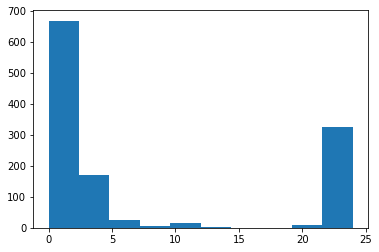

KeyboardInterrupt: Interrupted by user

In [41]:
all_summer_activity = do_everything(all_summer_raw, all_summer_processed)
all_summer_activity

In [ ]:
all_winter_activity = do_everything(all_winter_raw, all_winter_processed)
all_winter_activity

In [ ]:
all_spring_activity = do_everything(all_spring_raw, all_spring_processed)
all_spring_activity

In [ ]:
all_fall_activity = do_everything(all_fall_raw, all_fall_processed)
all_fall_activity

In [ ]:
summer_winter = all_summer_activity.append(all_winter_activity, ignore_index=True)
summer_winter_spring = summer_winter.append(all_spring_activity, ignore_index=True)
all_quarters_activity = summer_winter_spring.append(all_fall_activity, ignore_index=True)

In [ ]:
all_quarters_activity.to_parquet("data/seattle_undergrad/all_quarters_activity.parquet",
                               engine = "fastparquet", compression="gzip")

## Seattle Undergrad All Quarters Analysis

In [48]:
all_quarters_activity = pd.read_parquet('data/seattle_undergrad/all_quarters_activity.parquet')
all_quarters_activity

,UID,Date,GroupDayType,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM,Activity,bedtime,standarized_bedtime,sleep_duration_zscore,bedtime_zscore
0,summer_160048,2016-07-13,summer_16Weekday,2016-07-14 02:46:30,2016-07-14 08:49:15,6.045833,1606.50,529.25,-0.801863,2.766667,6.150000,-0.743735,0.311579
1,summer_160048,2016-07-14,summer_16Weekday,2016-07-15 02:25:00,2016-07-15 12:27:30,10.041667,1585.00,747.50,-0.395109,2.416667,5.800000,1.233268,0.067151
2,summer_160048,2016-07-15,summer_16Weekday,2016-07-16 01:42:00,2016-07-16 09:03:00,7.350000,1542.00,543.00,1.536863,1.700000,5.083333,-0.098477,-0.433345
3,summer_160048,2016-07-16,summer_16Weekend/Holiday,2016-07-17 04:45:30,2016-07-17 13:34:30,8.816667,1725.50,814.50,1.318894,4.750000,8.133333,0.627179,1.696671
4,summer_160048,2016-07-17,summer_16Weekend/Holiday,2016-07-18 01:31:15,2016-07-18 12:23:00,10.862500,1531.25,743.00,1.344529,1.516667,4.900000,1.639388,-0.561379
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6373,fall_160030,2016-11-07,fall_16Weekday,2016-11-08 02:02:45,2016-11-08 07:33:45,5.516667,1562.75,453.75,-0.228010,2.033333,8.033333,-1.069753,0.058225
6374,fall_160030,2016-11-08,fall_16Weekday,2016-11-09 02:09:00,2016-11-09 09:22:30,7.225000,1569.00,562.50,-0.610670,2.150000,8.150000,-0.204512,0.134213
6375,fall_160030,2016-11-09,fall_16Weekday,2016-11-10 02:43:15,2016-11-10 11:28:30,8.754167,1603.25,688.50,0.915694,2.716667,8.716667,0.569985,0.503297
6376,fall_160030,2016-11-12,fall_16Weekend/Holiday,2016-11-13 03:43:45,2016-11-13 12:45:45,9.033333,1663.75,765.75,-0.322485,3.716667,9.716667,0.711378,1.154623


**Sleep duration vs Activity**

In [49]:
predictors = ['sleep_duration_zscore']
X = all_quarters_activity[predictors]
Y = all_quarters_activity['Activity']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

<AxesSubplot:xlabel='sleep_duration_zscore', ylabel='Activity'>

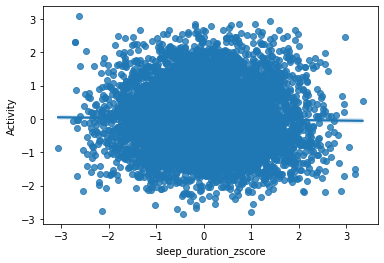

In [50]:
sns.regplot(x='sleep_duration_zscore', y='Activity', data=all_quarters_activity)

In [51]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Activity   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.711
Date:                Thu, 25 Aug 2022   Prob (F-statistic):              0.191
Time:                        17:00:53   Log-Likelihood:                -8784.4
No. Observations:                6378   AIC:                         1.757e+04
Df Residuals:                    6376   BIC:                         1.759e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.041e-17      0.012  -8.66e-16      1.000      -0.024       0.024
sleep_duration_zscore    -0.0164      0.013     -1.308      0.191      -0.041       0.008
==============================================================================
Omnibus:                       98.011   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.818
Skew:                           0.260   Prob(JB):                     7.00e-21
Kurtosis:                       2.718   Cond. No.                         1.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Standarized Bedtime vs Activity**

In [52]:
predictors = ['bedtime_zscore']
X = all_quarters_activity[predictors]
Y = all_quarters_activity['Activity']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

<AxesSubplot:xlabel='bedtime_zscore', ylabel='Activity'>

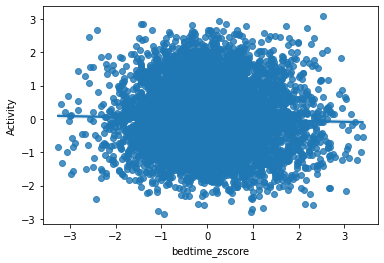

In [53]:
sns.regplot(x='bedtime_zscore', y='Activity', data=all_quarters_activity)

In [55]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Activity   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.152
Date:                Thu, 25 Aug 2022   Prob (F-statistic):             0.0233
Time:                        17:03:05   Log-Likelihood:                -8782.7
No. Observations:                6378   AIC:                         1.757e+04
Df Residuals:                    6376   BIC:                         1.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.041e-17      0.012  -8.67e-16      1.000      -0.024       0.024
bedtime_zscore    -0.0284      0.013     -2.270      0.023      -0.053      -0.004
==============================================================================
Omnibus:                       99.806   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.615
Skew:                           0.263   Prob(JB):                     2.85e-21
Kurtosis:                       2.717   Cond. No.                         1.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""